In [3]:
import matplotlib.pyplot as plt
from scipy.fftpack import dct,idct
import numpy as np

context_scale = 60
current_scale = 20
nb_timeseries = 1000

In [3]:


def scale(matrix):
    norm_matrix = matrix.copy()
    for row in range(matrix.shape[0]):
        norm_matrix[row,:] = (matrix[row,:]-np.min(matrix[row,:]))/(np.max(matrix[row,:])-np.min(matrix[row,:]))
    return norm_matrix


### Generating Multi-scale Patterns Using DCT Coefficients

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will b

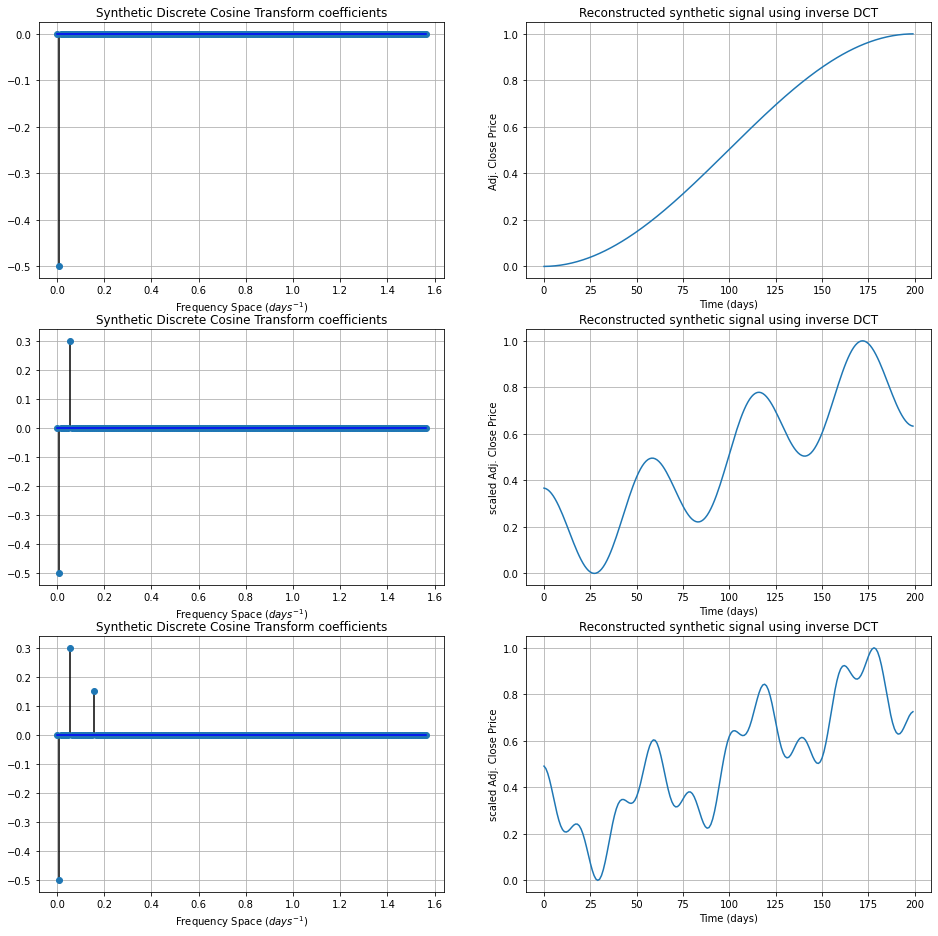

In [4]:
X_dct = np.zeros((nb_timeseries,200))
dct_x_axis = np.arange(200)*np.pi/(2*200)

i = 0
j = 1
k = 2

X_dct[0][1] = -0.5

X_dct[1][1] = -0.5
X_dct[1][7] = 0.3

X_dct[2][1] = -0.5
X_dct[2][7] = 0.3
X_dct[2][20] = 0.15

X_dct_reconstructed = idct(X_dct,norm="ortho")
X_dct_reconstructed = scale(X_dct_reconstructed)
fig, axes = plt.subplots(3,2,figsize=(16,16))

axes[0,0].set_title('Synthetic Discrete Cosine Transform coefficients')
axes[0,0].stem(dct_x_axis,X_dct[i],linefmt='k',basefmt='b')
axes[0,0].set_xlabel('Frequency Space ($days^{-1}$) ')
axes[0,0].grid()

axes[0,1].plot(X_dct_reconstructed[i])
#axes[0,2].plot(ifft(X_ft_mod[i]))
axes[0,1].set_title('Reconstructed synthetic signal using inverse DCT')
axes[0,1].set_ylabel('Adj. Close Price')
axes[0,1].set_xlabel('Time (days)')
axes[0,1].grid()

axes[1,0].set_title('Synthetic Discrete Cosine Transform coefficients')
axes[1,0].stem(dct_x_axis,X_dct[j],linefmt='k',basefmt='b')
axes[1,0].set_xlabel('Frequency Space ($days^{-1}$)')
axes[1,0].grid()

axes[1,1].plot(X_dct_reconstructed[j])
#axes[0,2].plot(ifft(X_ft_mod[i]))
axes[1,1].set_title('Reconstructed synthetic signal using inverse DCT')
axes[1,1].set_xlabel('Time (days)')
axes[1,1].set_ylabel('scaled Adj. Close Price')
axes[1,1].grid()

axes[2,0].set_title('Synthetic Discrete Cosine Transform coefficients')
axes[2,0].stem(dct_x_axis,X_dct[k],linefmt='k',basefmt='b')
axes[2,0].set_xlabel('Frequency Space ($days^{-1}$)')
axes[2,0].grid()

axes[2,1].plot(X_dct_reconstructed[k])
#axes[0,2].plot(ifft(X_ft_mod[i]))
axes[2,1].set_title('Reconstructed synthetic signal using inverse DCT')
axes[2,1].set_xlabel('Time (days)')
axes[2,1].set_ylabel('scaled Adj. Close Price')
axes[2,1].grid()

plt.savefig('.\saved_figures\synthetic_DCT.png')
plt.show()

Generate synthetic data that has the multiscale properties we are looking for, then check whether our multiscale measure captures it. Generate ~3000 time series to begin.

**Synthetic Data Generator**

- capable of generating many TS with different scales

- fixed length (argument)

- should be able to focus equally on short scale and long scale

equal amount of long term and short term




In [ ]:
attributes:
    - long period
    - short period
    - randomness 
    - noise discontinuities

In [1]:
import numpy as np
from scipy.fftpack import idct

class Synthetic_TS_generator:
    def __init__(self,nb_timeseries=3000,chunk_size=60,long_scale=True,short_scale=True,noise=False):
        self.nb_timeseries = nb_timeseries
        self.chunk_size = chunk_size
        self.long_scale = long_scale
        self.short_scale = short_scale
        self.noise = noise
        self.low_freq_range = (1,min(4,chunk_size))
        self.high_freq_range = (min(7,chunk_size),min(10,chunk_size))
        self.noise_freq_range = (min(15,chunk_size),chunk_size)
        self.dct_coefs = np.zeros((nb_timeseries,chunk_size))
        self.time_series = None
        #Build the random time series
        self.build_()
        
    def scale(self, matrix):
        norm_matrix = matrix.copy()
        for row in range(matrix.shape[0]):
            norm_matrix[row,:] = (matrix[row,:]-np.min(matrix[row,:]))/(np.max(matrix[row,:])-np.min(matrix[row,:]))
        return norm_matrix

        
    def build_(self):

        #Build long scale
        if self.long_scale == True:
            long_scale_coef_limit_0 = self.low_freq_range[0]
            long_scale_coef_limit_1 = self.low_freq_range[1]
            long_scale_coefs_idx = np.random.multinomial(1, [1/(long_scale_coef_limit_1-long_scale_coef_limit_0)]*(long_scale_coef_limit_1-long_scale_coef_limit_0),size=self.nb_timeseries) #pick a long scale coefficient at random
            long_scale_coefs_vals = np.random.uniform(low=-2,high=2,size=self.nb_timeseries)
            long_scale_coefs = np.multiply(long_scale_coefs_vals.reshape(-1,1),long_scale_coefs_idx)
            self.dct_coefs[:,long_scale_coef_limit_0:long_scale_coef_limit_1] = long_scale_coefs

        #Build short scale
        if self.short_scale == True:
            short_scale_coef_limit_0 = self.high_freq_range[0]
            short_scale_coef_limit_1 = self.high_freq_range[1]
            short_scale_coefs_idx = np.random.multinomial(1, [1/(short_scale_coef_limit_1-short_scale_coef_limit_0)]*(short_scale_coef_limit_1-short_scale_coef_limit_0),size=self.nb_timeseries) #pick a long scale coefficient at random
            short_scale_coefs_vals = np.multiply(long_scale_coefs_vals/2,np.random.binomial(n=1,p=0.5,size=self.nb_timeseries)*2-np.ones(self.nb_timeseries))
            short_scale_coefs = np.multiply(short_scale_coefs_vals.reshape(-1,1),short_scale_coefs_idx)
            self.dct_coefs[:,short_scale_coef_limit_0:short_scale_coef_limit_1] = short_scale_coefs

        #Build noise
        if self.noise == True:
            noise_scale_coef_limit_0 = self.noise_freq_range[0]
            noise_scale_coef_limit_1 = self.noise_freq_range[1]
            noise_scale_coefs_idx = np.random.multinomial(3, [1/(noise_scale_coef_limit_1-noise_scale_coef_limit_0)]*(noise_scale_coef_limit_1-noise_scale_coef_limit_0),size=self.nb_timeseries) #pick a long scale coefficient at random
            noise_scale_coefs_vals = np.multiply(long_scale_coefs_vals/6,np.random.binomial(n=1,p=0.5,size=self.nb_timeseries)*2-np.ones(self.nb_timeseries))
            noise_scale_coefs = np.multiply(noise_scale_coefs_vals.reshape(-1,1),noise_scale_coefs_idx)
            self.dct_coefs[:,noise_scale_coef_limit_0:noise_scale_coef_limit_1] = noise_scale_coefs


    def get_array(self):
        self.time_series = self.scale(idct(self.dct_coefs))
        return self.time_series
        
        
        
        

In [4]:
from Time_series_generator import Synthetic_TS_generator

context_scale = 60



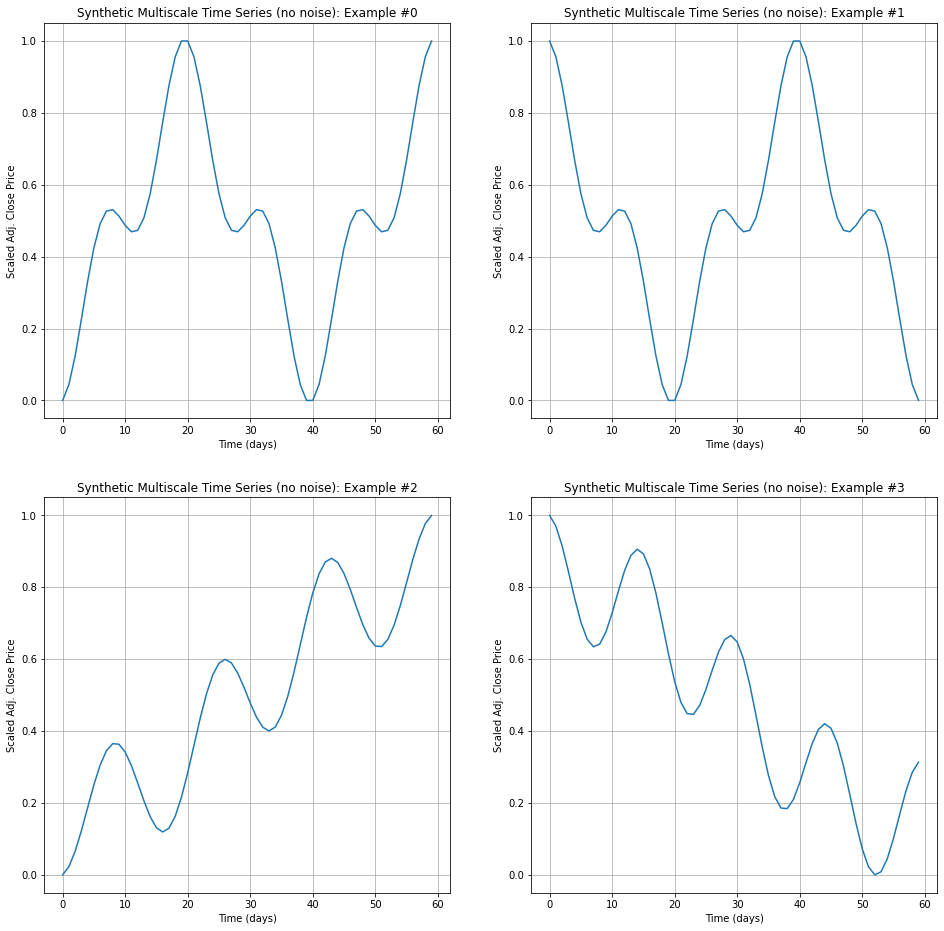

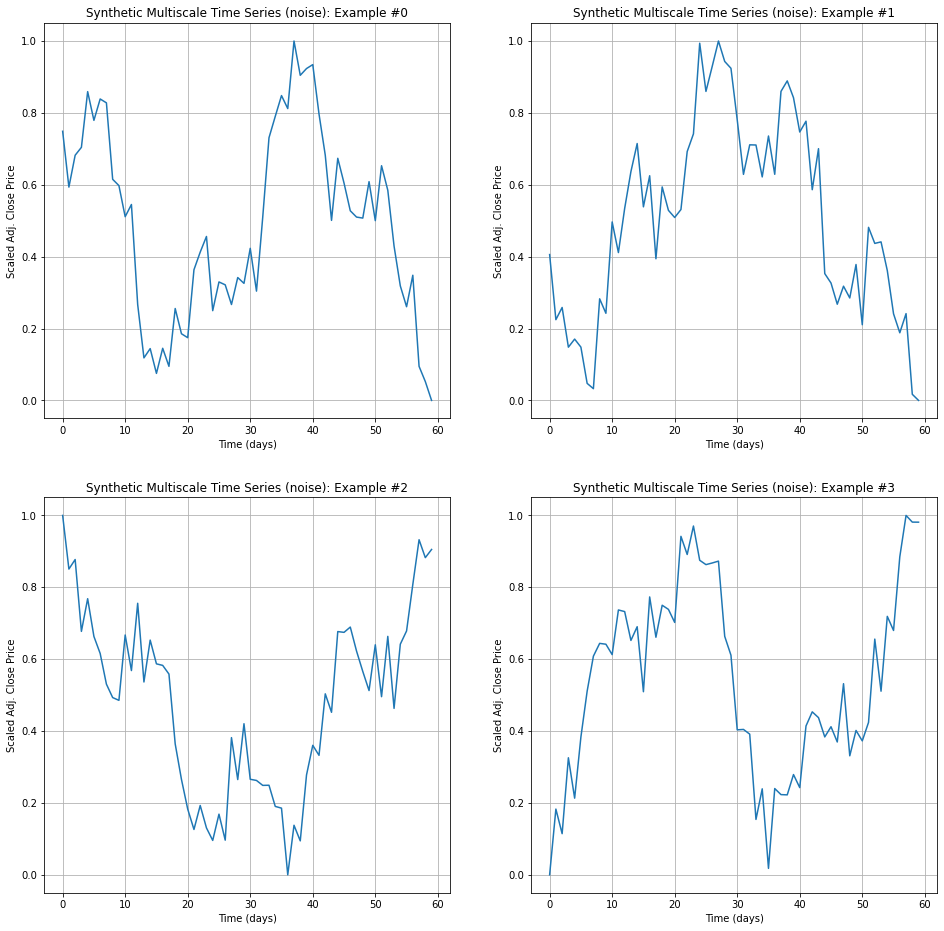

In [5]:
import matplotlib.pyplot as plt

from Time_series_generator import Synthetic_TS_generator

stg = Synthetic_TS_generator(noise=False)
X_synthetic = stg.get_array()
X_syn_coefs = stg.dct_coefs

fig, axes = plt.subplots(2,2,figsize=(16,16))

axes[0,0].set_title('Synthetic Multiscale Time Series (no noise): Example #0')
axes[0,0].plot(range(context_scale),X_synthetic[0])
axes[0,0].set_ylabel('Scaled Adj. Close Price')
axes[0,0].set_xlabel('Time (days)')
axes[0,0].grid()


axes[0,1].set_title('Synthetic Multiscale Time Series (no noise): Example #1')
axes[0,1].plot(range(context_scale),X_synthetic[1])
axes[0,1].set_ylabel('Scaled Adj. Close Price')
axes[0,1].set_xlabel('Time (days)')
axes[0,1].grid()

axes[1,0].set_title('Synthetic Multiscale Time Series (no noise): Example #2')
axes[1,0].plot(range(context_scale),X_synthetic[2])
axes[1,0].set_ylabel('Scaled Adj. Close Price')
axes[1,0].set_xlabel('Time (days)')
axes[1,0].grid()

axes[1,1].set_title('Synthetic Multiscale Time Series (no noise): Example #3')
axes[1,1].plot(range(context_scale),X_synthetic[3])
axes[1,1].set_ylabel('Scaled Adj. Close Price')
axes[1,1].set_xlabel('Time (days)')
axes[1,1].grid()

#plt.savefig('.\saved_figures\X_synthetic_nonoise.png')
plt.show()

stg = Synthetic_TS_generator(noise=True)
X_synthetic = stg.get_array()
X_syn_coefs = stg.dct_coefs

fig, axes = plt.subplots(2,2,figsize=(16,16))

axes[0,0].set_title('Synthetic Multiscale Time Series (noise): Example #0')
axes[0,0].plot(range(context_scale),X_synthetic[0])
axes[0,0].set_ylabel('Scaled Adj. Close Price')
axes[0,0].set_xlabel('Time (days)')
axes[0,0].grid()


axes[0,1].set_title('Synthetic Multiscale Time Series (noise): Example #1')
axes[0,1].plot(range(context_scale),X_synthetic[1])
axes[0,1].set_ylabel('Scaled Adj. Close Price')
axes[0,1].set_xlabel('Time (days)')
axes[0,1].grid()

axes[1,0].set_title('Synthetic Multiscale Time Series (noise): Example #2')
axes[1,0].plot(range(context_scale),X_synthetic[2])
axes[1,0].set_ylabel('Scaled Adj. Close Price')
axes[1,0].set_xlabel('Time (days)')
axes[1,0].grid()

axes[1,1].set_title('Synthetic Multiscale Time Series (noise): Example #3')
axes[1,1].plot(range(context_scale),X_synthetic[3])
axes[1,1].set_ylabel('Scaled Adj. Close Price')
axes[1,1].set_xlabel('Time (days)')
axes[1,1].grid()

#plt.savefig('.\saved_figures\X_synthetic_noise.png')
plt.show()

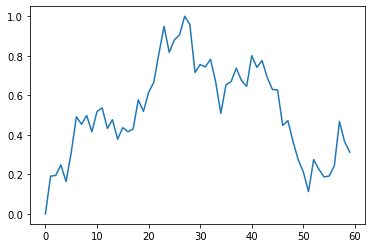

In [10]:
plt.plot(X_synthetic[4])

## Problem: current synthetic data generator does not generate enough random data.

In [1]:

from scipy.fftpack import idct

class Synthetic_TS_generator:
    """
    author:@mtchibozo
    date:11/19/2020
    
    
    This class generates random time series with multiscale patterns.
    To ensure multiscale properties, we create one low frequency and one high frequency DCT coefficient while mainting all other coefficients to zero. We also add an attribute to add noise to the smooth signal.
    Possible impovement: as is, the code only uses 60 coefficients (or context_scale). We could introduce more coefficients to generate a more complex time series, then subsample a time series of length context_scale.
    
    
    Parameters
    ----------
   
    
    Attributes
    ----------
    nb_coefs: int
    The number of DCT coefficients which are kept for the DCT transform (all other coefficients are set to zero).
    nb_coefs = 13 was determined after applying the elbow method to the plot of np.linalg.norm(X-X_smoothed) with varying values of nb_coefs.
    
     nb_timeseries: int (default 3000) 
     Number of multiscale synthetic time series we want to generate.
     
     chunk_size: int (default 60)
     Length of each synthetic time series.
     
     long_scale: Boolean (default True)
     Whether or not we want a long scale trend in the signal (=low frequency).
     
     short_scale: Boolean (default True)
     Whether or not we want a short scale trend in the signal (=high frequency)
     
     noise: Boolean (default False)
     Whether or not we want noise in the signal (=very high frequency).
     
     low_freq_range: tuple (default (1,min(4,chunk_size))
     Range of DCT coefficients which we consider for the long scale.
     
     high_freq_range: tuple (default (min(7,chunk_size),min(10,chunk_size)))
     Range of DCT coefficients which we consider for the short scale.
     
     noise_freq_range: tuple (default (min(15,chunk_size),chunk_size))
     Range of DCT coefficients which we consider for noise
     
     dct_coefs: np.array (default np.zeros((nb_timeseries,chunk_size)))
     Dataset containing the DCT coefficients associated to the synthetic time series.
     
     time_series: np.array (default np.zeros((nb_timeseries,chunk_size)))
     Dataset containing the synthetic time series. The time series are Min-Max scaled.
     time series = inverse DCT (DCT coefficients).

        Example
    -------
    >>> stg = Synthetic_TS_generator(noise=True)
    >>> X_synthetic = stg.get_array()

    
    """

    def __init__(self,nb_timeseries=3000,chunk_size=60,long_scale=True,short_scale=True,noise=False):
        self.nb_timeseries = nb_timeseries
        self.chunk_size = chunk_size
        self.long_scale = long_scale
        self.short_scale = short_scale
        self.noise = noise
        self.low_freq_range = (1,min(4,chunk_size))
        self.high_freq_range = (min(7,chunk_size),min(10,chunk_size))
        self.noise_freq_range = (min(15,chunk_size),chunk_size)
        self.dct_coefs = np.zeros((nb_timeseries,chunk_size))
        self.time_series = np.zeros((nb_timeseries,chunk_size))
        #Build the random time series
        self.build_()
        
    def scale(self, matrix):
        norm_matrix = matrix.copy()
        for row in range(matrix.shape[0]):
            norm_matrix[row,:] = (matrix[row,:]-np.min(matrix[row,:]))/(np.max(matrix[row,:])-np.min(matrix[row,:]))
        return norm_matrix

        
    def build_(self):

        #Build long scale
        long_scale_coef_limit_0 = self.low_freq_range[0]
        long_scale_coef_limit_1 = self.low_freq_range[1]
        long_scale_coefs_idx = np.random.multinomial(long_scale_coef_limit_1-long_scale_coef_limit_0 + 1, [1/(long_scale_coef_limit_1-long_scale_coef_limit_0)]*(long_scale_coef_limit_1-long_scale_coef_limit_0),size=self.nb_timeseries) #pick a long scale coefficient at random
        long_scale_coefs_vals = np.random.uniform(low=-2,high=2,size=self.nb_timeseries)
        
        long_scale_coefs = np.multiply(long_scale_coefs_vals.reshape(-1,1),long_scale_coefs_idx)
        if self.long_scale == True:
            self.dct_coefs[:,long_scale_coef_limit_0:long_scale_coef_limit_1] = long_scale_coefs

        #Build short scale
        short_scale_coef_limit_0 = self.high_freq_range[0]
        short_scale_coef_limit_1 = self.high_freq_range[1]
        short_scale_coefs_idx = np.random.multinomial(short_scale_coef_limit_1-short_scale_coef_limit_0 + 1, [1/(short_scale_coef_limit_1-short_scale_coef_limit_0)]*(short_scale_coef_limit_1-short_scale_coef_limit_0),size=self.nb_timeseries) #pick a long scale coefficient at random
        short_scale_coefs_vals = np.multiply(long_scale_coefs_vals/2,np.random.binomial(n=1,p=0.5,size=self.nb_timeseries)*2-np.ones(self.nb_timeseries))
        short_scale_coefs = np.multiply(short_scale_coefs_vals.reshape(-1,1),short_scale_coefs_idx)
        if self.short_scale == True:
            self.dct_coefs[:,short_scale_coef_limit_0:short_scale_coef_limit_1] = short_scale_coefs

        #Build noise
        noise_scale_coef_limit_0 = self.noise_freq_range[0]
        noise_scale_coef_limit_1 = self.noise_freq_range[1]
        noise_scale_coefs_idx = np.random.multinomial(3, [1/(noise_scale_coef_limit_1-noise_scale_coef_limit_0)]*(noise_scale_coef_limit_1-noise_scale_coef_limit_0),size=self.nb_timeseries) #pick a long scale coefficient at random
        noise_scale_coefs_vals = np.multiply(long_scale_coefs_vals/6,np.random.binomial(n=1,p=0.5,size=self.nb_timeseries)*2-np.ones(self.nb_timeseries))
        noise_scale_coefs = np.multiply(noise_scale_coefs_vals.reshape(-1,1),noise_scale_coefs_idx)
        if self.noise == True:
            self.dct_coefs[:,noise_scale_coef_limit_0:noise_scale_coef_limit_1] = noise_scale_coefs


    def get_array(self):
        self.time_series = self.scale(idct(self.dct_coefs))
        return self.time_series
        


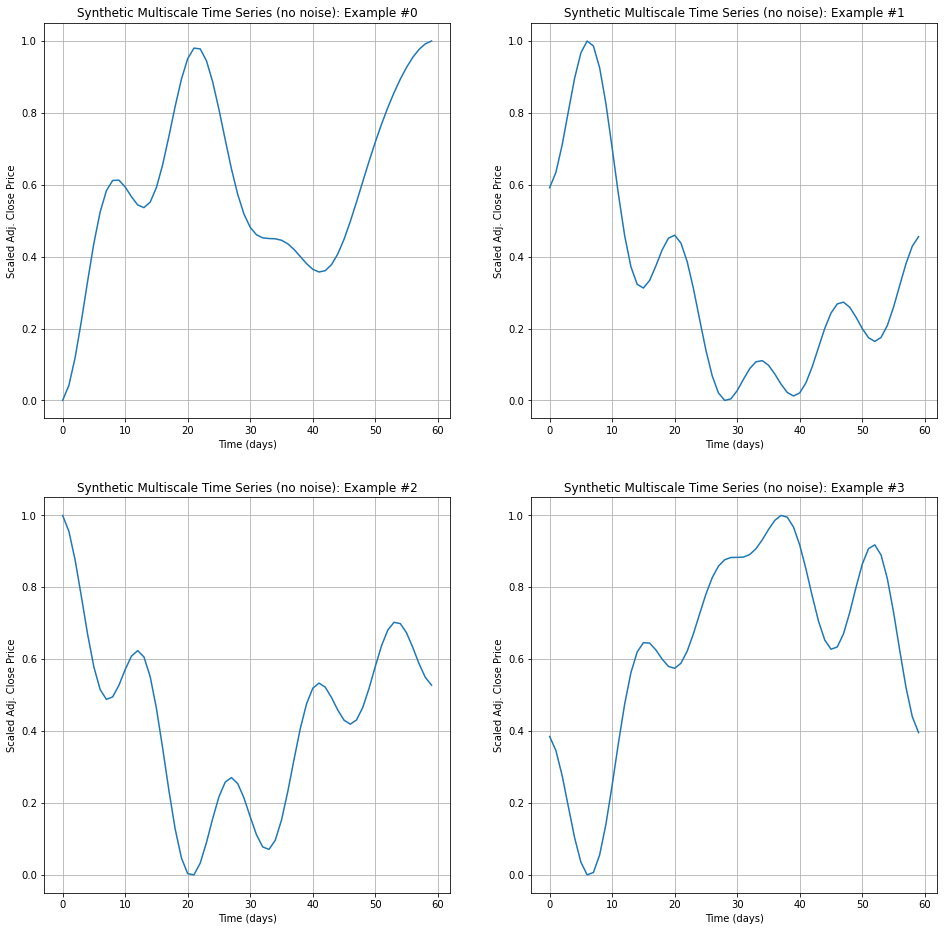

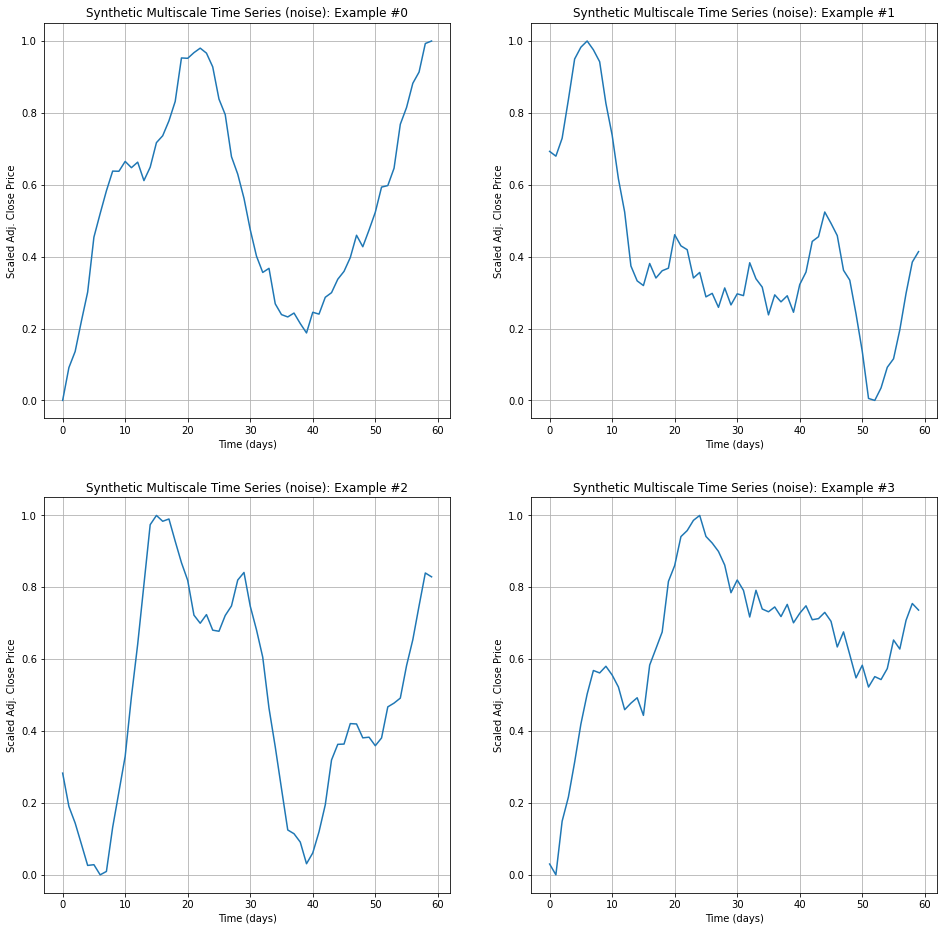

In [4]:

stg = Synthetic_TS_generator(noise=False)
X_synthetic = stg.get_array()
X_syn_coefs = stg.dct_coefs

fig, axes = plt.subplots(2,2,figsize=(16,16))

axes[0,0].set_title('Synthetic Multiscale Time Series (no noise): Example #0')
axes[0,0].plot(range(context_scale),X_synthetic[0])
axes[0,0].set_ylabel('Scaled Adj. Close Price')
axes[0,0].set_xlabel('Time (days)')
axes[0,0].grid()


axes[0,1].set_title('Synthetic Multiscale Time Series (no noise): Example #1')
axes[0,1].plot(range(context_scale),X_synthetic[1])
axes[0,1].set_ylabel('Scaled Adj. Close Price')
axes[0,1].set_xlabel('Time (days)')
axes[0,1].grid()

axes[1,0].set_title('Synthetic Multiscale Time Series (no noise): Example #2')
axes[1,0].plot(range(context_scale),X_synthetic[2])
axes[1,0].set_ylabel('Scaled Adj. Close Price')
axes[1,0].set_xlabel('Time (days)')
axes[1,0].grid()

axes[1,1].set_title('Synthetic Multiscale Time Series (no noise): Example #3')
axes[1,1].plot(range(context_scale),X_synthetic[3])
axes[1,1].set_ylabel('Scaled Adj. Close Price')
axes[1,1].set_xlabel('Time (days)')
axes[1,1].grid()

#plt.savefig('.\saved_figures\X_synthetic_nonoise.png')
plt.show()

stg = Synthetic_TS_generator(noise=True)
X_synthetic = stg.get_array()
X_syn_coefs = stg.dct_coefs

fig, axes = plt.subplots(2,2,figsize=(16,16))

axes[0,0].set_title('Synthetic Multiscale Time Series (noise): Example #0')
axes[0,0].plot(range(context_scale),X_synthetic[0])
axes[0,0].set_ylabel('Scaled Adj. Close Price')
axes[0,0].set_xlabel('Time (days)')
axes[0,0].grid()


axes[0,1].set_title('Synthetic Multiscale Time Series (noise): Example #1')
axes[0,1].plot(range(context_scale),X_synthetic[1])
axes[0,1].set_ylabel('Scaled Adj. Close Price')
axes[0,1].set_xlabel('Time (days)')
axes[0,1].grid()

axes[1,0].set_title('Synthetic Multiscale Time Series (noise): Example #2')
axes[1,0].plot(range(context_scale),X_synthetic[2])
axes[1,0].set_ylabel('Scaled Adj. Close Price')
axes[1,0].set_xlabel('Time (days)')
axes[1,0].grid()

axes[1,1].set_title('Synthetic Multiscale Time Series (noise): Example #3')
axes[1,1].plot(range(context_scale),X_synthetic[3])
axes[1,1].set_ylabel('Scaled Adj. Close Price')
axes[1,1].set_xlabel('Time (days)')
axes[1,1].grid()

#plt.savefig('.\saved_figures\X_synthetic_noise.png')
plt.show()